In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
Data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
Data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Observations

- There are no null values in the data set.
- The target feature column in the 'Appliances'.
- Features that are not important for the analysis are: 'date' and 'lights'


In [4]:
# Remove columns not needed: date and lights

Data_Removed = Data.drop(columns =['date', 'lights'], axis = 1) 
Data_Removed.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
Data_Matrix = Data_Removed.corr()
Data_Matrix

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


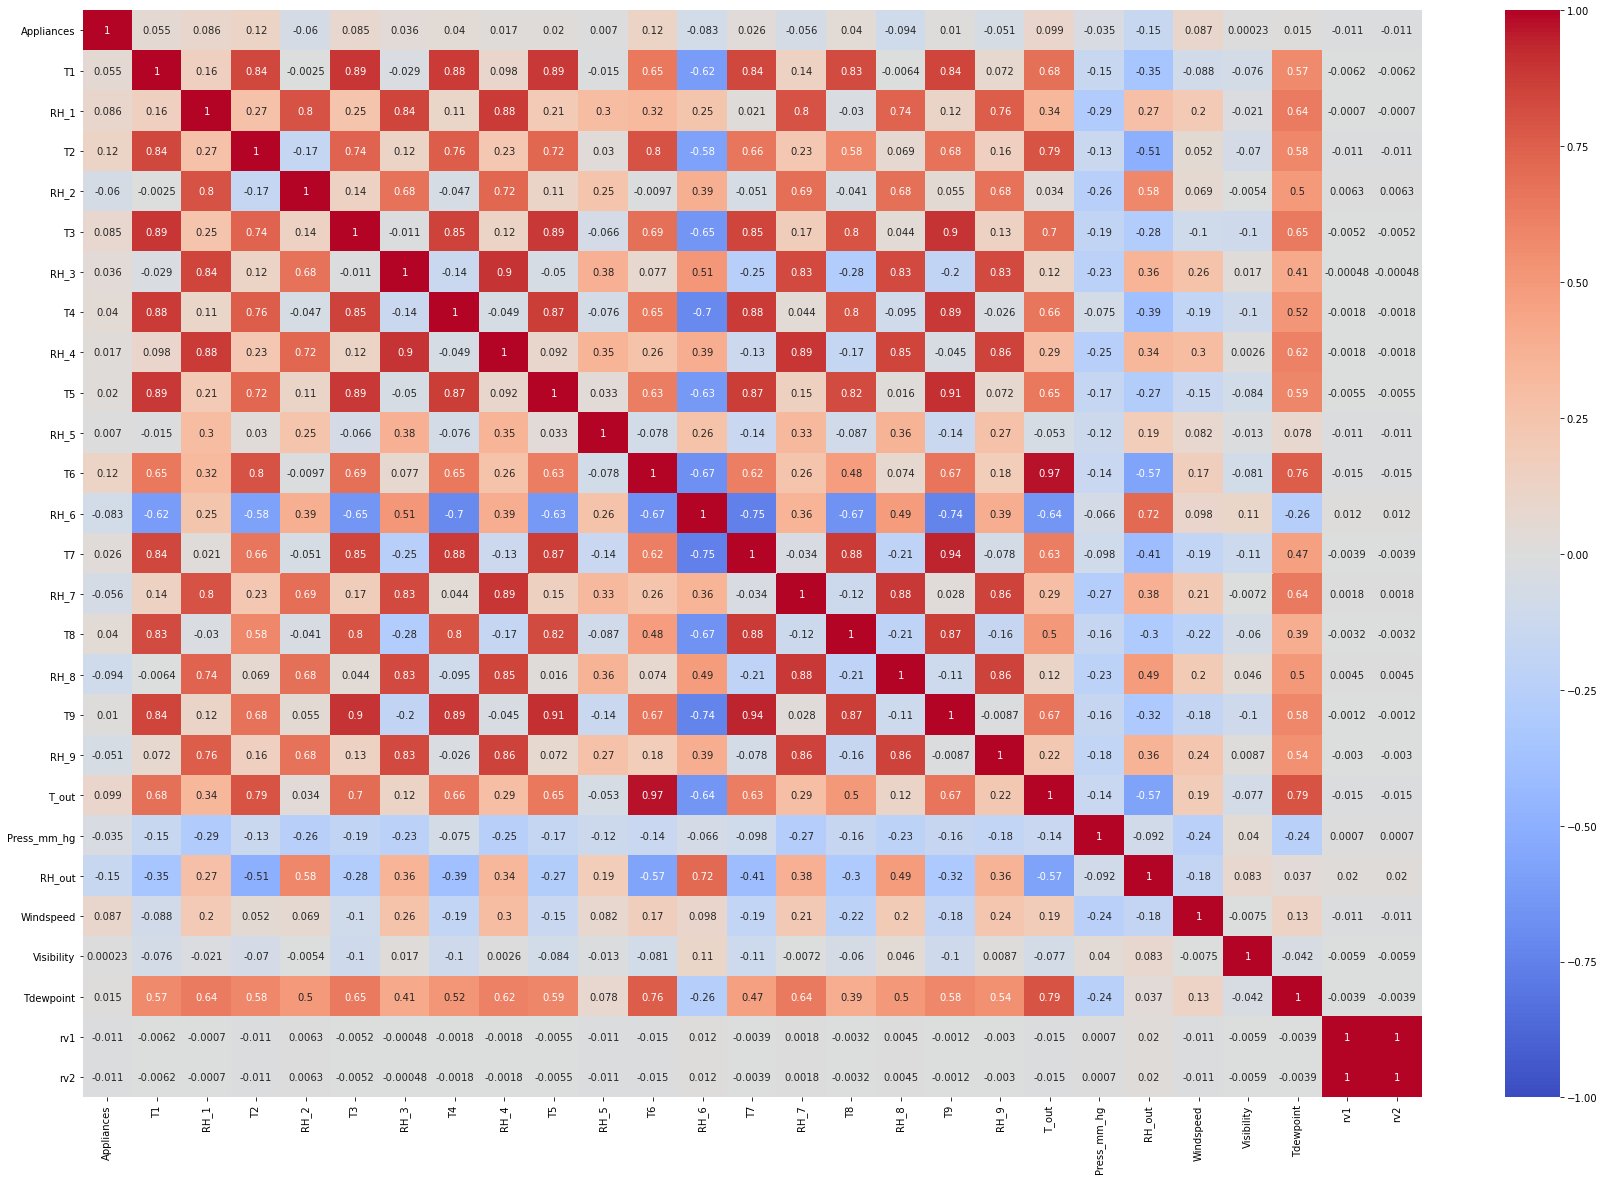

In [6]:
plt.figure(figsize = (30,20))
Data_Matrixplot = sns.heatmap(Data_Matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
Data_Matrixplot

In [7]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data and convert to a dataframe
Scaled_Data = pd.DataFrame(scaler.fit_transform(Data_Removed.values), columns=Data_Removed.columns, index=Data_Removed.index)
Scaled_Data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [8]:
# Separate the other attributes from the predicting attribute
X = Scaled_Data.drop('Appliances',axis=1)

# Separate the predicting attribute into Y for model training 
y = Scaled_Data['Appliances']

In [9]:
# Check the shape of X
X.shape

(19735, 26)

In [10]:
#Check the shape of y
y.shape

(19735,)

In [11]:
#Check if there are Nan values in X
X.isnull().sum().sum()

0

In [12]:
# Check if there are Nan values in y
y.isnull().sum().sum()

0

In [13]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
# Import the module
from sklearn.linear_model import LinearRegression

# Create an object of LinearRegression class
LR = LinearRegression()

# Fit the training data
model = LR.fit(X_train, y_train)
model

LinearRegression()

In [15]:
y_prediction =  LR.predict(X_test)
y_prediction

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [16]:
# Check the y intercept
model.intercept_

0.15290295882253055

In [17]:
# Import R2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Predict the accuracy score
score=r2_score(y_test, y_prediction)

print("R-Squared",score)
print("MSE",mean_squared_error(y_test, y_prediction))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_prediction)))
print("MAE",mean_absolute_error(y_test, y_prediction))

R-Squared 0.14890246319303535
MSE 0.007658778867195367
RMSE 0.0875144494766171
MAE 0.05013362397742957


## Explanation of the above values:

- The R2 is 0.14 meaning 14% of the variance of the target variable (appliances) can be explained by all the variables put together. This is a low accuracy score. Probably this would change if we do feature engineering and hyperparameter tuning.

- The mean squared error (MSE) is how close the data points are close to the regression line. We have an MSE of 0.007 which is a good forecast.

- The root mean squared error (RMSE) is the standard deviation of the unexplained variance thus having a low value of 0.09 shows us we have a good fit.

- The mean absolute error (MAE) is the average difference in errors between the actual and the predicted values. In this case, It's showing us the MAE of this model is 0.05 which is the the average error we will get when predicting the predicted value. 

- The y intercept is at 0.15 which is where the regression line passes through along the y axis.


In [18]:
# Fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) 
# and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

X2 = Scaled_Data['T2']
y2 = Scaled_Data['T6']

#Convert to DataFrame
X2 = pd.DataFrame(X2)
y2 = pd.DataFrame(y2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

LR2 = LinearRegression()
model2 = LR2.fit(X2_train, y2_train)

y2_prediction =  LR2.predict(X2_test)

score2 = r2_score(y2_test, y2_prediction)

print("R-Squared T2T6",score)


R-Squared T2T6 0.14890246319303535


In [19]:
print("MAE T2T6",mean_absolute_error(y2_test, y2_prediction))

MAE T2T6 0.08216970202681717


In [20]:
print("MSE T2T6",mean_squared_error(y2_test, y2_prediction))
print("RMSE T2T6",np.sqrt(mean_squared_error(y2_test, y2_prediction)))

MSE T2T6 0.011166285957258442
RMSE T2T6 0.10567064851347531


In [21]:
print ("Coefficient of determination :",r2_score(y2_test, y2_prediction))

Coefficient of determination : 0.6427789637197383


In [22]:
# Train a ridge regression model

from sklearn.linear_model import Ridge

RM = Ridge(alpha=0.4)
model3 = RM.fit(X2_train, y2_train)  

y3_prediction = model3.predict(X2_test)          

print("RMSE Ridge",np.sqrt(mean_squared_error(y2_test, y3_prediction)))

RMSE Ridge 0.10567068865045522


In [23]:
# Train a lasso regression model

from sklearn.linear_model import Lasso

LS = Lasso(alpha=0.001)
model4 = LS.fit(X2_train, y2_train)  

y4_prediction = model4.predict(X2_test)          

print("RMSE Lasso",np.sqrt(mean_squared_error(y2_test, y4_prediction)))

RMSE Lasso 0.10585233765426631
